We will generate various plots using R.
- Line graph.
- Histogram.
- Bar charts.
- Pie Charts.
- Stem and Leaf.

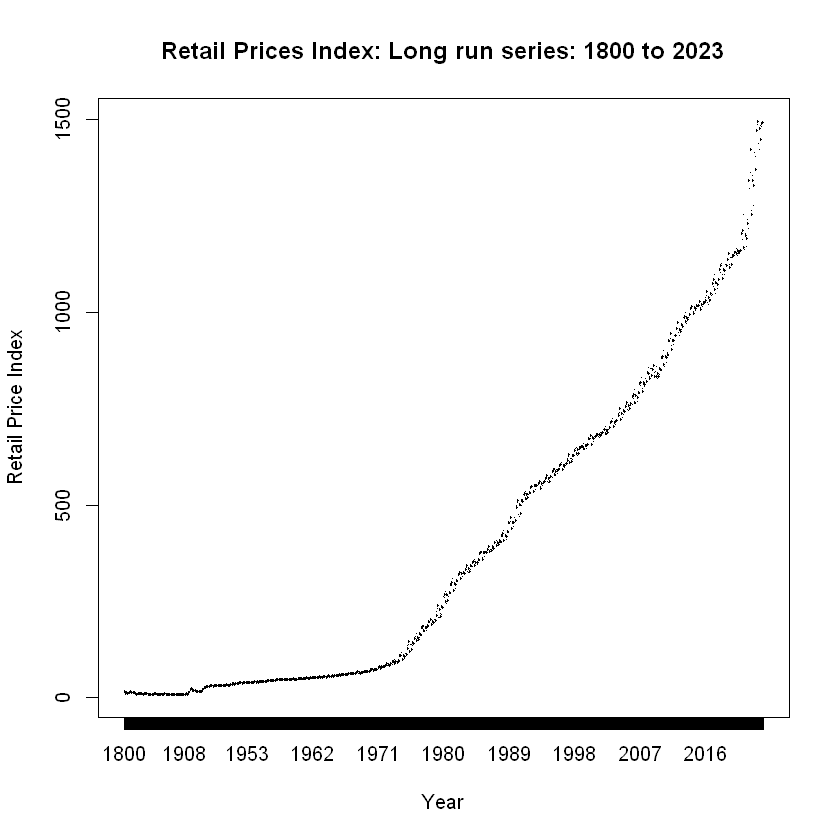

In [38]:
# Plotting line graph of Retail Price Index.

# Read data from CSV file skipping the first 8 rows as data starts at row 9.
rpi = read.csv("data/series-140224.csv", skip = 8, header = FALSE)

# Assign column names.
colnames(rpi) = c("Year", "RPI")

# Plotting
plot(rpi$Year, rpi$RPI, type = "l", xlab = "Year", ylab = "Retail Price Index", main = "Retail Prices Index: Long run series: 1800 to 2023")

In [2]:
# Loading Dataset.
dt = read.csv("data/NY-House-Dataset.csv")

In [3]:
# Names of the Variables.
names(dt)

[1] "BROKERTITLE"                 "TYPE"                       
 [3] "PRICE"                       "BEDS"                       
 [5] "BATH"                        "PROPERTYSQFT"               
 [7] "ADDRESS"                     "STATE"                      
 [9] "MAIN_ADDRESS"                "ADMINISTRATIVE_AREA_LEVEL_2"
[11] "LOCALITY"                    "SUBLOCALITY"                
[13] "STREET_NAME"                 "LONG_NAME"                  
[15] "FORMATTED_ADDRESS"           "LATITUDE"                   
[17] "LONGITUDE"

In [4]:
summary(dt)

                                        BROKERTITLE  
 Brokered by COMPASS                          : 456  
 Brokered by Douglas Elliman - 575 Madison Ave: 110  
 Brokered by Brown Harris Stevens             :  93  
 Brokered by Corcoran East Side               :  91  
 Brokered by RE MAX Edge                      :  79  
 Brokered by Winzone Realty Inc               :  68  
 (Other)                                      :3904  
                         TYPE          PRICE                BEDS       
 Co-op for sale            :1450   Min.   :2.494e+03   Min.   : 1.000  
 House for sale            :1012   1st Qu.:4.990e+05   1st Qu.: 2.000  
 Condo for sale            : 891   Median :8.250e+05   Median : 3.000  
 Multi-family home for sale: 727   Mean   :2.357e+06   Mean   : 3.357  
 Townhouse for sale        : 299   3rd Qu.:1.495e+06   3rd Qu.: 4.000  
 Pending                   : 243   Max.   :2.147e+09   Max.   :50.000  
 (Other)                   : 179                                

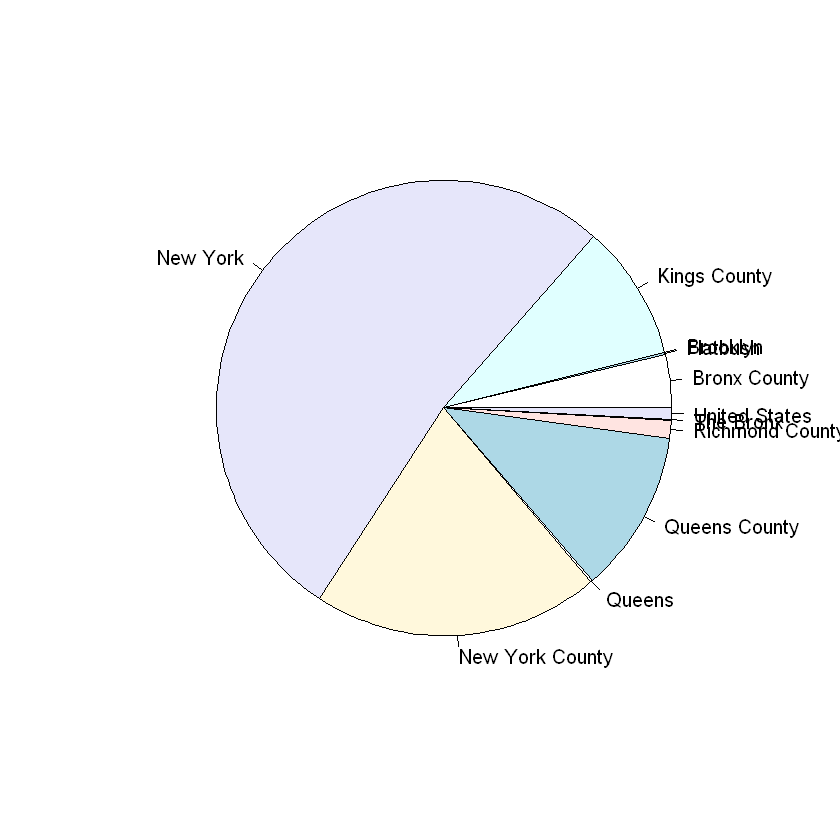

In [6]:
# Plotting pie chart.
freq_dist_LOCALITY = table(dt$LOCALITY)  # Frequency distribution of the variable LOCALITY.
pie(freq_dist_LOCALITY)

In [7]:
attach(dt)  # Access variables of a DataFrame without invoking any function or method.

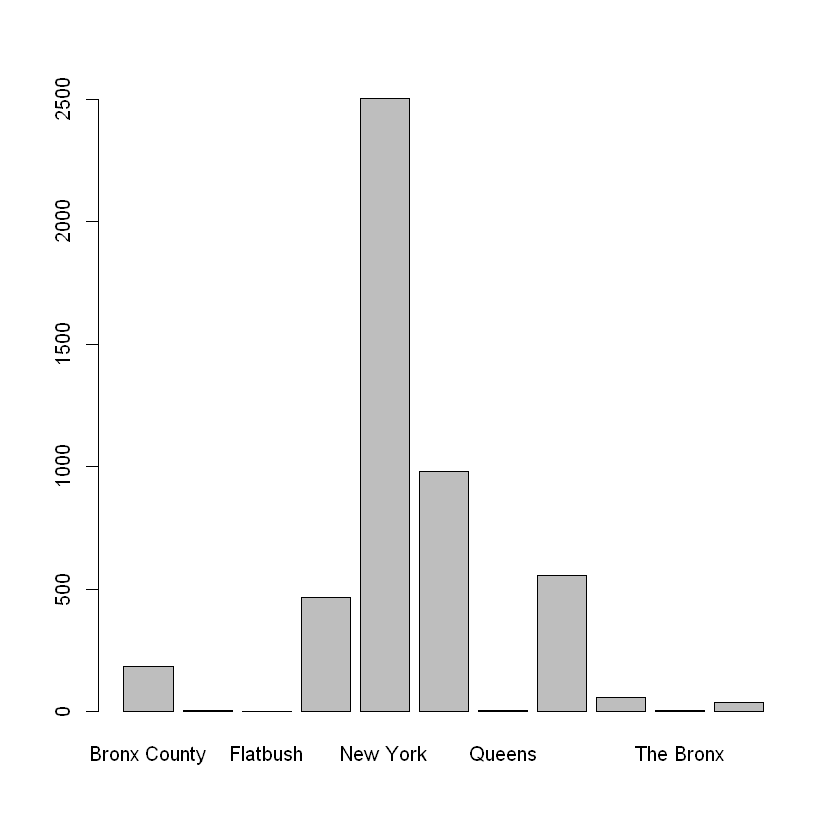

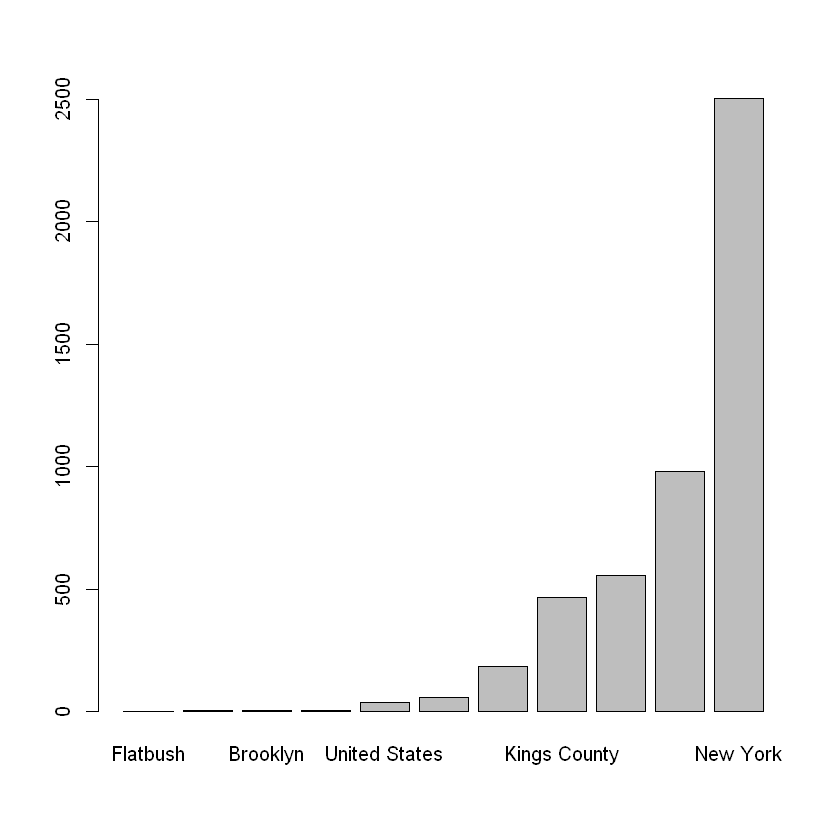

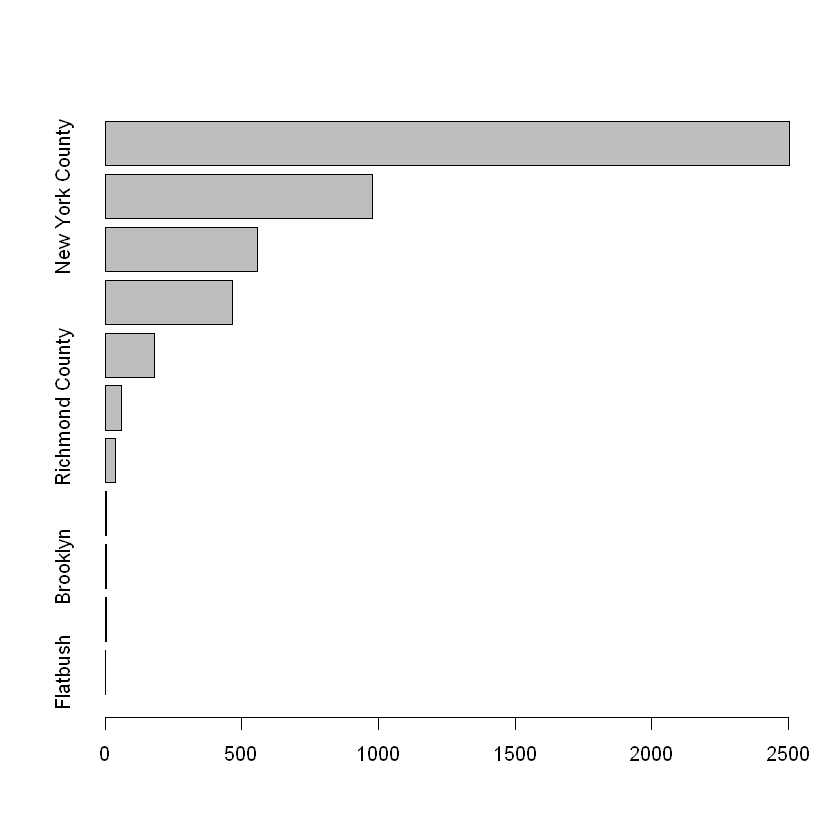

In [8]:
# Plotting Pareto Plot.
barplot(freq_dist_LOCALITY)
barplot(sort(freq_dist_LOCALITY))  # Pareto plot.
barplot(sort(freq_dist_LOCALITY), horiz = TRUE)  # Horizontal Pareto plot.

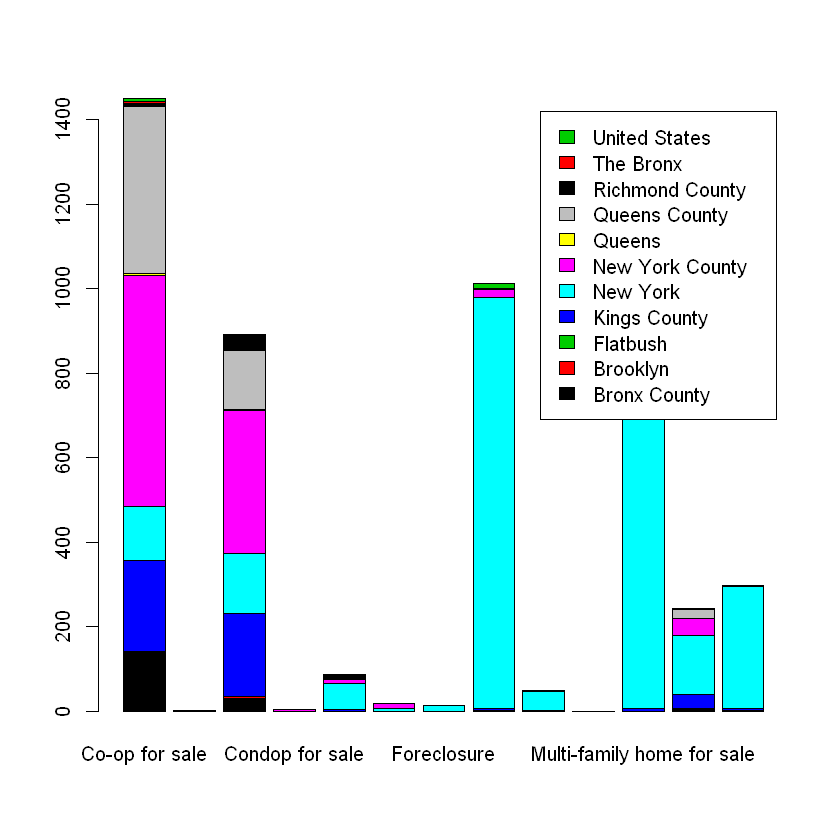

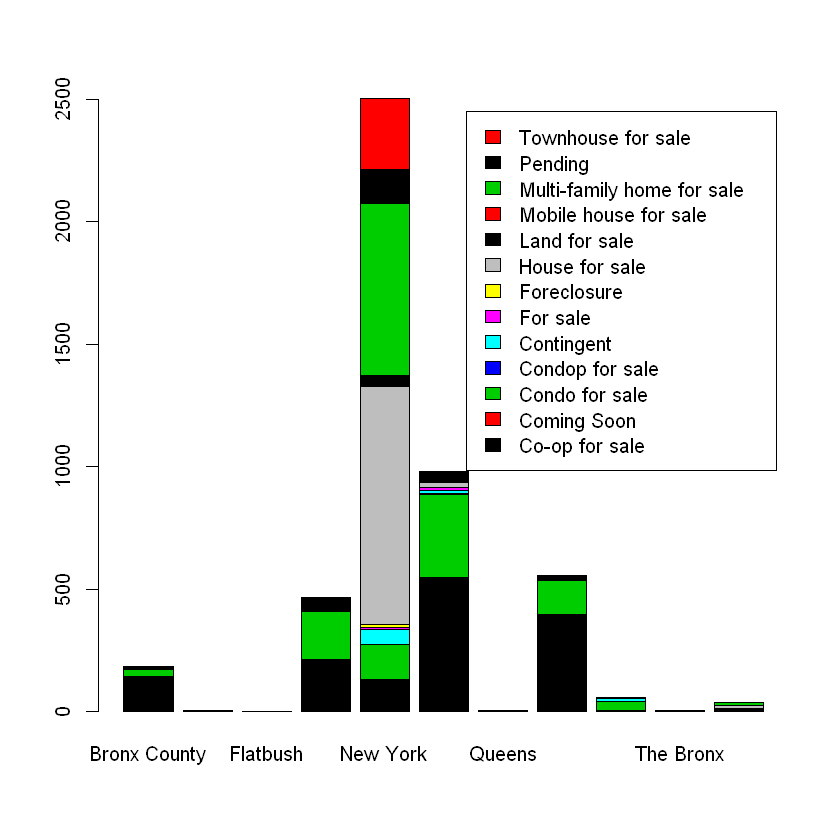

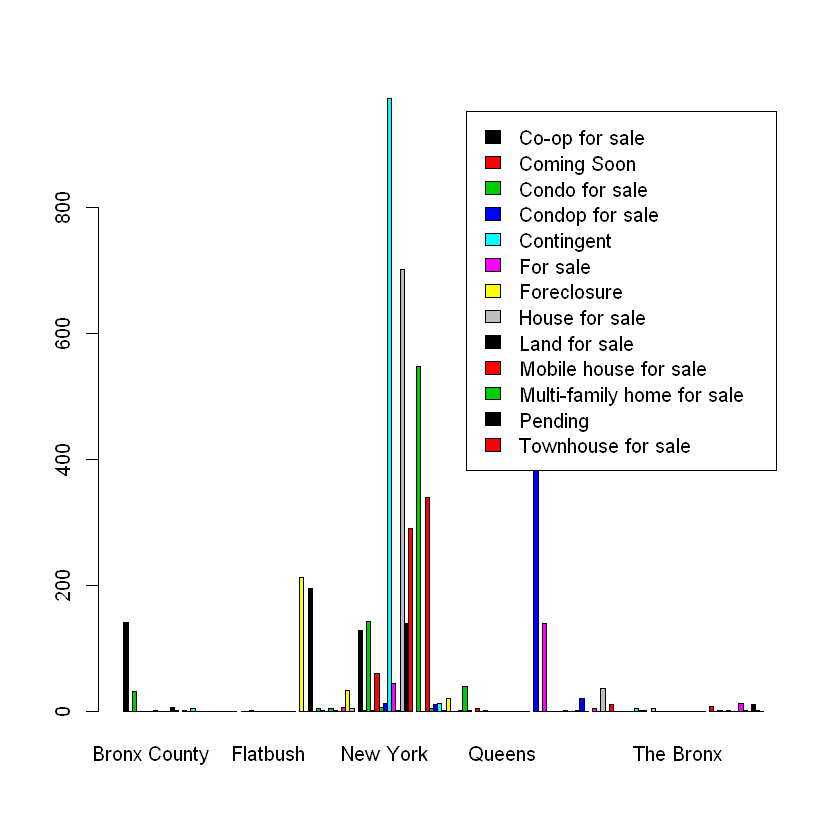

In [14]:
# Plotting Stacked Barchart and Side-by-side Barchart.
barplot(table(LOCALITY,TYPE), legend = TRUE, col = 1:11)
barplot(table(TYPE,LOCALITY), legend = TRUE, col = 1:11)

barplot(table(TYPE,LOCALITY), beside = TRUE, legend = TRUE, col = 1:11)  # Side-by-side barchart.

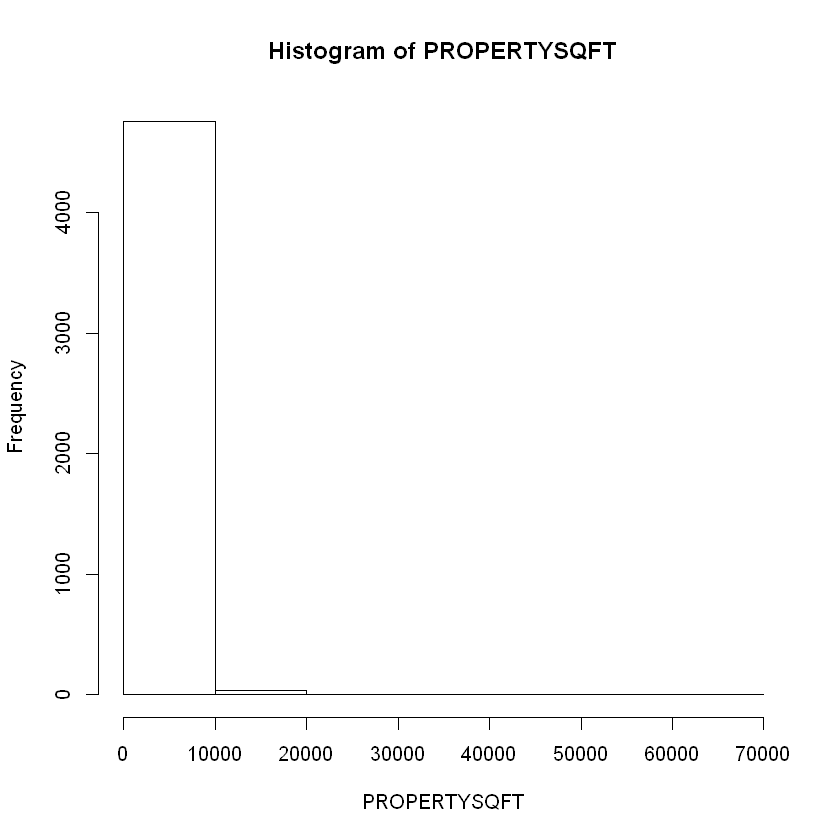

In [26]:
# Plotting Histogram.
#hist(PROPERTYSQFT, breaks = 3)
hist(PROPERTYSQFT, breaks = seq(0,70000,10000))

In [28]:
# Plotting Stem and Leaf diagram.
stem(PROPERTYSQFT)


  The decimal point is 4 digit(s) to the right of the |

  0 | 00000000000000000000000000000000000000000000000000000000000011111111+4474
  0 | 55555555555555555555555555555555555555555555555555555555555555555555+120
  1 | 00000011111112222222223334
  1 | 556678889
  2 | 01234
  2 | 7
  3 | 23
  3 | 
  4 | 
  4 | 8
  5 | 
  5 | 55
  6 | 
  6 | 6



### Central Tendency
- Mean.
- Median.
- Mode.

In [42]:
# Mean.
x = c(1,58,12,15,112,14,15)  # Creates a vector.
mean(x)

[1] 32.42857

### Weighted Mean
$$
\bar{x} = \frac{\Sigma x_i w_i}{\Sigma w_i}
$$

In [40]:
weights = c(20,30,50)
marks = c(74,92,87)

sum(weights*marks)/sum(weights)

[1] 85.9

### Median

In [43]:
median(marks)
median(c(10,20,30,40))

[1] 87

[1] 25

### Mode
No built-in function to calculate mode in R.

In [55]:
modal <- function(x) 
{
### R function to calculate the mode of a (categorical)variable.

 tt <- table(x)
 mc <- which(tt==max(tt))
 if(length(mc) == length(x)) {
  modal = "There is no mode."
 } else {
  modal = names(tt[mc])
 }
return(modal)
}

In [56]:
mode = modal(c(1,1,1,2,2,5,7,8,8,8,9,9,10))
print(mode)

[1] "1" "8"


### Hildebrand Rule and Skewness
Hildebrand's Rule is a heuristic or a rough guide used to estimate the skewness of a distribution based on the relationship between the mean, median, and mode. It's not a formal statistical measure like Pearson's skewness coefficient, but it can give a quick indication of skewness. For a more precise measure of skewness, formal statistical methods like Pearson's skewness coefficient or visual inspection of the data through histograms or Q-Q plots can be used.

`Hildebrand Ratio` is defined as
$$H = \frac{\bar{x}-\tilde{x}}{s}$$
where $\bar{x}$ is the sample mean, $\tilde{x}$ is the sample median and $s$ is the sample standard deviation. If $|H|<0.20$, then the data are sufficiently symmetric and mean can be used. If not we should used Median.

In [60]:
y = c(72,70,75,66,68,70,69,52)
H = (mean(y)-median(y))/sd(y)
H

[1] -0.2535357

Since, y is not sufficiently symmetric(H = -0.25), the mean should not be used as the measure of centre.

### Measures of Spread
Measure of how much we can expect a value to differ from the measure of centre.
- Range ($max - min$).
- Variance.
- IQR ($Q_3 - Q_1$).


### Variance
Polulation variance($\sigma^2$) is given by:
$$\sigma^2 = \frac{\Sigma (x_i - \mu)^2}{N}$$
Sample variance($s^2$) is given by:
$$s^2 = \frac{\Sigma (x_i - \bar{x})^2}{n-1}$$
The main purpose of sample statistics is to estimate a population parameter. The divisor $(n-1)$ ensures that it is an unbiased estimator for population variance $\sigma^2.$

In [63]:
var(c(31,22,52,62,54))  # Sample variance.

[1] 285.2

In [66]:
# Calculating Polupation Variance.
n = 5
var(c(31,22,52,62,54)) * (n-1)/n

[1] 228.16

In [69]:
# Population Variance function.
population_var = function(x)
    {
    return (mean( (x-mean(x))^2))
    }

In [70]:
population_var(c(31,22,52,62,54))

[1] 228.16

### Coefficient of Cariation
The coefficient of variation (CV) is a statistical measure used to assess the relative variability or dispersion of a dataset, irrespective of the units of measurement. It's particularly useful when comparing variability between datasets with different means or units.
$$CV = \left( \frac{s}{\bar{x}} \right) \times 100\%$$
where $\bar{x}$ is the sample mean and $s$ is the sample standard deviation.
A lower CV indicates lower variability relative to the mean, while a higher CV suggests higher variability relative to the mean.

### Measures of Relative Position
- Percentiles.
- Quartiles.
- Box-Plot.
- Z-scores.

### Percentiles
A percentile is a measure used in statistics to indicate the value below which a given percentage of observations in a group of observations fall. The location of data value for the $P^{th}$ percentile in the ordered data set is :
$$L = n * \frac{P}{100}$$
where, n = No. of data points and P = $P^{th}$ percentile.
When using this formula to find the location of the percentile's value in the data set, you must make sure to follow these two rules.
* If the formula results in a decimal value for L, the location is the next larger whole number.
* If the formula results in a whole number, the percentile's value is the arithmetic mean of the data value in that location and the data value in the next larger location.

In [5]:
# R gives summary of 5 Quartiles easily.
a = c(22,15,29,65,89,77,58,35,45,65,85,25,14,17,12,89,36,65,95)
summary(a)
length(a)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   23.50   45.00   49.37   71.00   95.00 

[1] 19

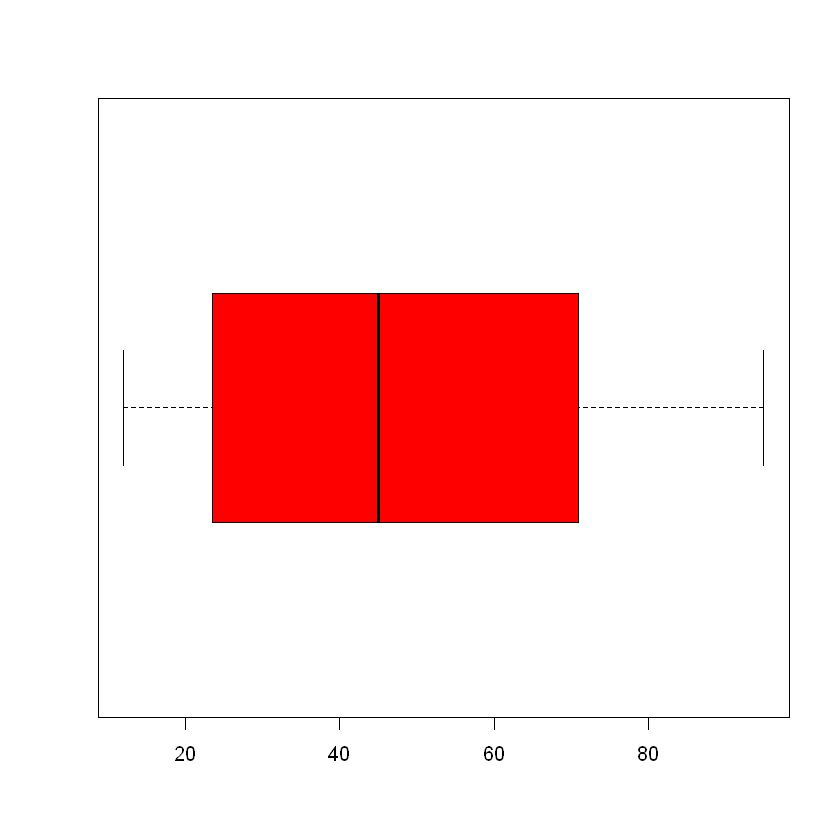

In [16]:
# Box and whisker Plot.
boxplot(a,horizontal = TRUE, col = 'red')

### Standard Score
The standard score/ Z-score for a population is given by $$z = \frac{x- \mu}{\sigma}$$
If the z-score is 1.47 then it is approxiately 1.47 standard deviations above mean.

- Counting the number of heads if a coin is flipped 3 times in a row.
The pmf is given by:
$$
\begin{aligned}
\mathbb{P}[X=x] = 
\begin{cases}
  0.125 & \text{if } x = 0 \text{ or } 3 \\
  0.375 & \text{if } x = 1  \text{ or } 2\\
  0 & \text{if } \text{Otherwise}
\end{cases}
\end{aligned}
$$
The Expected Value is calculated as:
$$\mathbb{E}[X] = \sum_{x\in\Omega} x \mathbb{P}[X=x]$$
And the Variance is:
$$\mathbb{V}[X] = \sum_{x\in\Omega} (x-\mu)^2 \mathbb{P}[X=x]$$
The Median is:
$$\tilde{X} = \{x|\mathbb{P}[X\leq x] \geq 0.50 \text{ and } \mathbb{P}[X\geq x] \geq 0.50\}$$
For continuous distribution, the definition of median reduces to $\mathbb{P}[X\leq \tilde{x}] = 0.50$
Lets calculate these in R.

In [2]:
# Expected Value.
x = 0:3  # x = 0,1,2,3
p = c(0.125, 0.375, 0.375, 0.125)
expected_value = sum(x*p)
print(expected_value)

[1] 1.5


In [3]:
# Variance.
variance = sum( (x-expected_value)^2 * p )
std_deviation = sqrt(variance)
print(paste('Var =', variance, 'Standard Deviation =', std_deviation))

[1] "Var = 0.75 Standard Deviation = 0.866025403784439"


In [8]:
# Median.
print(cumsum(p))
print(x)

[1] 0.125 0.500 0.875 1.000
[1] 0 1 2 3


So median is any number between 1 and 2.